In [21]:
# Install wordcloud package if not already installed
!pip install wordcloud


     -------------------------------------- 300.6/300.6 kB 6.2 MB/s eta 0:00:00


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Suppress warnings for cleaner notebook presentation
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# Load the dataset
news = pd.read_csv('news_articles.csv')

# Display the first few rows of the dataset
news.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [4]:
news.shape

(2096, 12)

In [5]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [6]:
news.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [10]:
# Handle missing values
news = news.dropna()

In [7]:
news.duplicated().sum()

10

In [11]:
# Remove duplicates
news = news.drop_duplicates()

In [13]:
news.shape

(2035, 12)

In [14]:
#checking unique values in different variables
unique_values = {}
for col in news.columns:
    unique_values[col] =news[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
author,485
published,1956
title,1755
text,1936
language,5
site_url,68
main_img_url,1181
type,8
label,2
title_without_stopwords,1752


In [15]:
# Checking the value counts of each feature
for col in news:
  print(news[col].value_counts())
  print("-" * 50)

No Author                              505
Activist Post                           82
EdJenner                                73
noreply@blogger.com (Der Postillon)     72
Daniel Greenfield                       55
                                      ... 
Phyllis Chesler                          1
Emma-Kate Symons                         1
Ilana Mercer                             1
Jack Kerwick                             1
Jerome R. Corsi                          1
Name: author, Length: 485, dtype: int64
--------------------------------------------------
2016-11-01T13:00:00.000+02:00    8
2016-10-30T13:00:00.000+02:00    8
2016-10-29T14:00:00.000+03:00    6
2016-10-29T09:34:00.000+03:00    5
2016-10-27T03:00:00.000+03:00    4
                                ..
2016-10-31T23:29:50.571+02:00    1
2016-10-31T19:07:54.707+02:00    1
2016-10-30T06:14:19.090+02:00    1
2016-10-29T23:06:30.669+03:00    1
2016-10-27T03:05:05.815+03:00    1
Name: published, Length: 1956, dtype: int64
-------

Fake    1281
Real     754
Name: label, dtype: int64


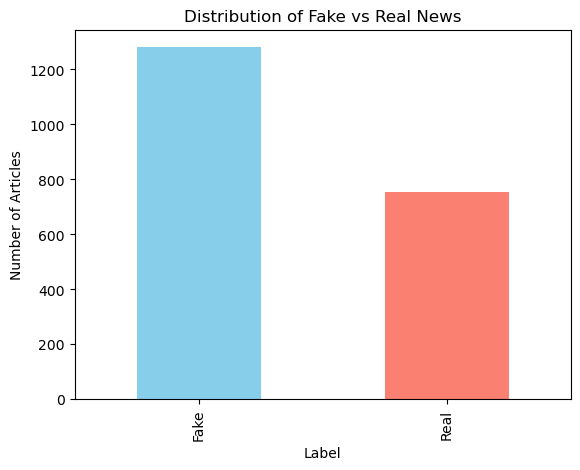

In [17]:
# Distribution of fake vs real news
print(news['label'].value_counts())


news['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Fake vs Real News')
plt.xlabel('Label')
plt.ylabel('Number of Articles')
plt.show()


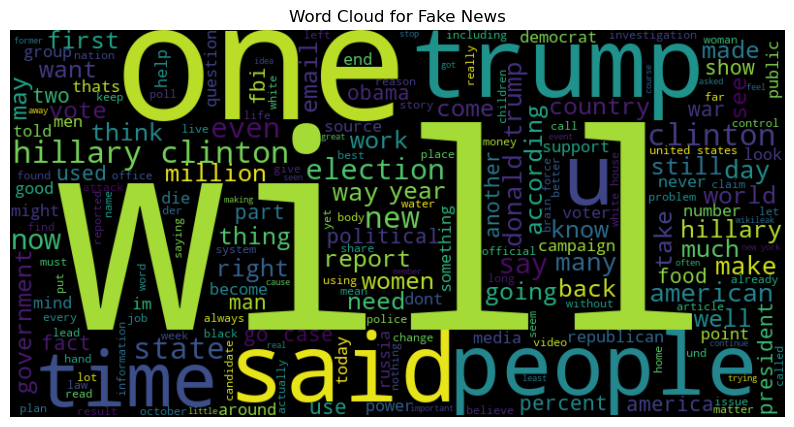

In [24]:
from wordcloud import WordCloud

# Word Cloud for Fake News
fake_news = ' '.join(news[news['label'] == 'Fake']['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_news)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

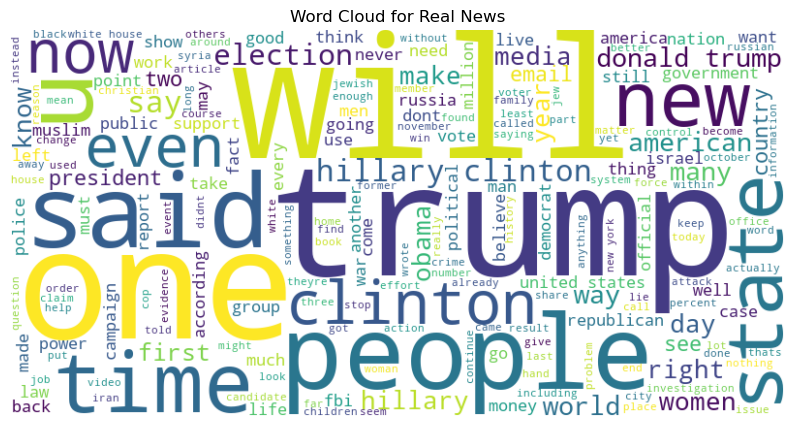

In [25]:
# Word Cloud for Real News
real_news = ' '.join(news[news['label'] == 'Real']['text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_news)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()